# IEOR 4501 Final Project
## Group Xueba
### Install needed modules for the project

In [4]:
!pip install pyecharts

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Import necessary modules

In [ ]:
import requests 
from bs4 import BeautifulSoup 
import re
import numpy as np
import pandas as pd
from pyecharts import Page, Pie, Bar  
import matplotlib.pyplot as plt
import seaborn as sns

### Start Web Requsets

In [6]:
# Send requests to get the source code of the web pages for parsing
def start_requests(url):
    r = requests.get(url)
    # Test if the url can be parsed  
    if r.status_code != 200:
        print('Failure')
    else:
        return r.content

### Getting Data

In [10]:
# Put all movies information into a dictionary (all info of a type as list): easy for table
movie_Dict = {'Name':[],'Year':[], 'Level':[], 'Genre':[], 'Score':[], 'Director':[], 'Votes':[], 'Gross_in_Million':[]}
# Put all movies information into a List (each movie as dictionary): easy for chart
movie_List = []

# Parse the source code of the web pages and find all the information needed
def parse(text):
    # Use Beautiful Soup to parse source code
    soup = BeautifulSoup(text, 'html.parser')
    # Find all of the information of each movie inside the same tag 'div' with arttribute "class='lister-item-content'"
    content_List = soup.find_all('div', class_ = 'lister-item-content')
    for movie in content_List:
        # According to the html & Find detailed information inside each movie
        movies_Name = movie.find_all('a')[0].text
        # Since some parts of movie info are not available, Exceptions should be applied here.
        try:
            movies_Year = movie.find_all('span')[1].text
            movies_ReleaseYear = re.findall(r'\d{4}', movies_Year)[0]
        except:
            movies_ReleaseYear = 'No Year Info'
        try:
            movies_R_Level = movie.find_all('span', class_ = 'certificate')[0].text.strip()
        except:
            movies_R_Level = 'Not Rated'
        try:
            movies_Genre = movie.find_all('span', class_ = 'genre')[0].text.strip().replace(',','')
        except:
            movies_Genre = 'Not Classified'
        try:
            movies_Score = float(movie.find_all('div', class_ = 'inline-block ratings-imdb-rating')[0]['data-value'])
        except:
            movies_Score = 0
        try:
            movies_Director = movie.find_all('p')[2].find_all('a')[0].text
        except:
            movies_Director = 'No Director Info'
        try: 
            movies_Votes = int(movie.find_all('p')[3].find_all('span')[1]['data-value'])
        except:
            movies_Votes = 0
        try: 
            movies_Gross = int(movie.find_all('p')[3].find_all('span')[4]['data-value'].replace(',',''))/1000000
        except:
            movies_Gross = 0
            
        movie_Dict['Name'].append(movies_Name)
        movie_Dict['Year'].append(movies_ReleaseYear)
        movie_Dict['Level'].append(movies_R_Level)
        movie_Dict['Genre'].append(movies_Genre)
        movie_Dict['Score'].append(movies_Score)
        movie_Dict['Director'].append(movies_Director)
        movie_Dict['Votes'].append(movies_Votes)
        movie_Dict['Gross_in_Million'].append(movies_Gross)
        
        movie_List.append({'Name': movies_Name, 'Year': movies_ReleaseYear, 'Level':movies_R_Level, 
                            'Genre': movies_Genre, 'Score': movies_Score, 'Director':movies_Director,
                            'Votes': movies_Votes, 'Gross_in_Million':movies_Gross})

# Main function: call the other functions
def main():
    numbers = int(input("Please enter a number of page(s) you want to crawl (it should be an integer between 1 to 8048):"))
    # Require an integer input between 1 to 8048
    if numbers > 0 and numbers < 8049:
        # For Loop: Make the crawler be able to crawl multiple pages (url)
        for i in range(numbers):
            x = 1 + (i * 50)
            url = f'https://www.imdb.com/search/title?title_type=feature&start={x}&ref_=adv_nxt'
            text = start_requests(url)
            parse(text)
    else:
        raise ValueError('Number Invalid. Please enter again, thank you!')

if __name__ == '__main__':
    main()

# print(movie_Dict)
# len(movie_Dict['Year'])
# print(movie_List)


Please enter a number of page(s) you want to crawl (it should be an integer between 1 to 8048):3


### Creating Dataframe

In [13]:
Dataframe = pd.DataFrame(movie_Dict)   #organize data we got into a csv file to make it clear
Dataframe[[ 'Name','Year','Level', 'Genre','Score','Director','Votes','Gross_in_Million']].to_csv('movies.csv') #export data to csv

In [15]:
movies_table = pd.read_csv("movies.csv") #read csv file in python
Dataframe = movies_table[['Name','Year','Level', 'Genre','Score','Director','Votes','Gross_in_Million']]#create table
Dataframe.head(150) #use 50 movies as example

,Name,Year,Level,Genre,Score,Director,Votes,Gross_in_Million
0,Fantastic Beasts: The Crimes of Grindelwald,2018,PG-13,Adventure Family Fantasy,6.9,David Yates,67727,123.141406
1,The Ballad of Buster Scruggs,2018,R,Comedy Drama Musical,7.4,Ethan Coen,28672,0.000000
2,Bohemian Rhapsody,2018,PG-13,Biography Drama Music,8.4,Bryan Singer,130232,156.323150
3,Creed II,2018,PG-13,Drama Sport,8.0,Steven Caple Jr.,9678,64.336284
4,The Lion King,2019,Not Rated,Animation Adventure Drama,0.0,Jon Favreau,0,0.000000
5,Ralph Breaks the Internet,2018,PG,Animation Adventure Comedy,7.6,Phil Johnston,10891,93.538233
6,Robin Hood,2018,PG-13,Action Adventure Thriller,5.3,Otto Bathurst,6218,17.027682
7,Widows,2018,R,Crime Drama Thriller,7.4,Steve McQueen,14974,28.660245
8,A Star Is Born,2018,R,Drama Music Romance,8.2,Bradley Cooper,106259,191.917436
9,Aquaman,2018,PG-13,Action Adventure Fantasy,0.0,James Wan,0,0.000000


### Some Basic Data Analysis
#### 1. Building a Pie Chart relating Movie Genres

In [16]:
types = movie_Dict['Genre']   #select 'genre' from data set
#print(types)
type_count = {}    #into dict
for x in types:     #count no. of movies in each genre
    type_list = x.strip().split()
    for y in type_list:
        if y not in type_count:
            type_count[y] = 1
        else:
            type_count[y] += 1


pie_graph = Pie('Percentage of Movie Genres',title_pos= 'center', width = 900  )  #draw pie_graph by using pyechart
pie_graph.add('', list(type_count.keys()),list(type_count.values()), is_label_show=True, is_legend_show = True,
              legend_orient='vertical', legend_pos='right')
pie_graph.render() #this command gives a html file called pie.html in our project folder. 

In [17]:
pie_graph #display the graph but it cannot be seen on github #use the html file to view

#### 2. Counting Movie Genres and Building a Histagram

In [19]:
unique_genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War']
#new data set

In [20]:
genre_count = [] #count no. of movies in different genres
for genre in unique_genres:    
    count = Dataframe['Genre'].str.contains(genre)
    genre_count.append([genre,len(Dataframe[count])])
genreCountDF = pd.DataFrame(genre_count, columns = ['Genre','Count']) #put data in a csv file
genreSorted = genreCountDF.sort_values(by=['Count'], ascending=False) #sort data in ascending order
top5genre = genreSorted[:5]
genreSorted  

,Genre,Count
6,Drama,65
1,Adventure,64
0,Action,52
4,Comedy,38
8,Fantasy,28
5,Crime,24
17,Thriller,22
3,Biography,19
7,Family,19
15,Sci-Fi,17


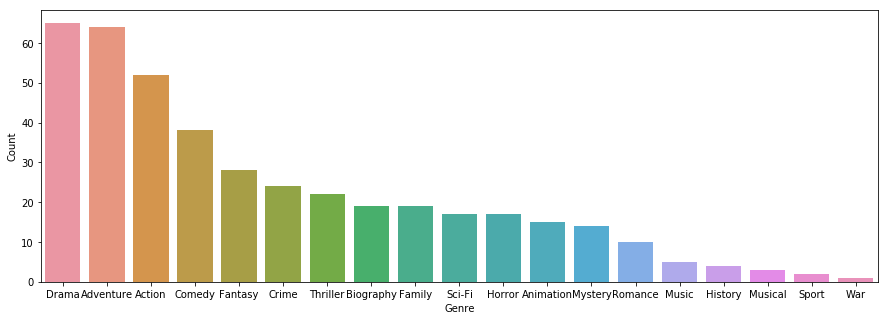

In [21]:
fig, ax = plt.subplots(figsize=(15,5)) 
sns.barplot(x = 'Genre', y = 'Count', data = genreSorted[:19]) 
#create barplot by using seaborn

#### 3. Ranking Votes of Movies

In [22]:
votes_list= sorted(movie_List , key = lambda x: int(x['Votes']))  #sort votes by descinding order
 
names = [i['Name'] for i in votes_list]

votes = [x['Votes'] for x in votes_list]  #select variables 

votes_bar_chart = Bar('Ranking of Votes', title_pos= 'center', width = 900) #title of the graph
votes_bar_chart.add('',names[-20:],votes[-20:],is_label_show=True,is_convert=True #draw bar chart using pyecharts
                    ,datazoom_type='inside', label_pos='right',xaxis_name='Number of Votes',)

votes_bar_chart.render() #this command gives a html file called votes_bar_chart.html in our project folder.

In [23]:
votes_bar_chart #display the graph but it cannot be seen on github #use the html file to view

#### 4. Movie Score Frequency Analysis

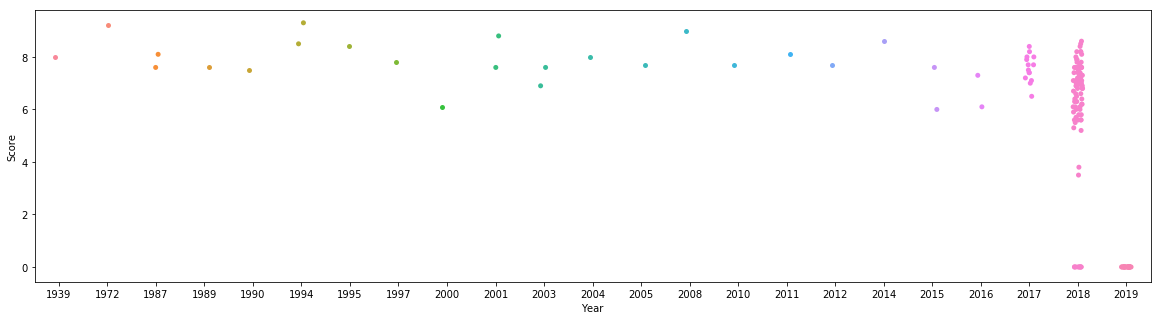

In [24]:
fig, ax = plt.subplots(figsize=(20,5))  
sns.stripplot(x = 'Year', y = 'Score', data = Dataframe)
# create scatter idagram by using seaborn to tell the relationship of year and score

#### 5. Score Frequency Analysis

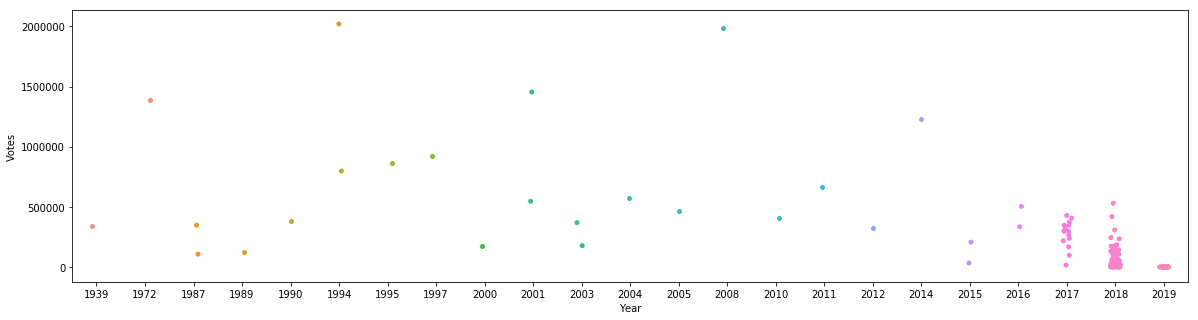

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
sns.stripplot(x = 'Year', y = 'Votes', data = Dataframe)
# create scatter idagram by using seaborn to tell the relationship of year and Votes

#### 6. Votes and gross chart

In [26]:
Dataframe[['Votes','Gross_in_Million']].to_csv('Votes&Gross.csv')  #imports rows and gross data into a new csv file
movies_table2 = pd.read_csv("Votes&Gross.csv") #read csv file 
Data = movies_table2[[ 'Votes', 'Gross_in_Million']]  #create table

Data.head(30) #show 30 movies with votes and gross

,Votes,Gross_in_Million
0,67727,123.141406
1,28672,0.000000
2,130232,156.323150
3,9678,64.336284
4,0,0.000000
5,10891,93.538233
6,6218,17.027682
7,14974,28.660245
8,106259,191.917436
9,0,0.000000


#### 7.Votes and gross comparison

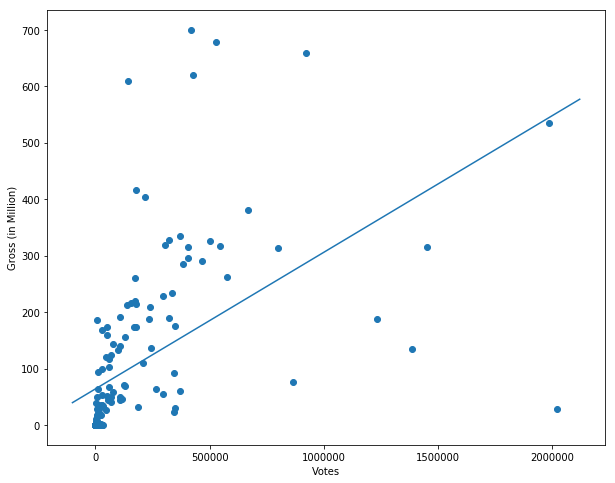

In [27]:
plt.figure(figsize=(10,8))  #define figure size
# Scatter plot
x = movie_Dict['Votes'] #horizotal axis
y = movie_Dict['Gross_in_Million']  #vertical axis
plt.scatter(x, y) #plot scatter graph using  matplotlib.pyplot
plt.xlabel('Votes')
plt.ylabel('Gross (in Million)')  #label two axises

# Add Trendline
axes = plt.gca()
m, b = np.polyfit(x, y, 1)
x_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(x_plot, m*x_plot + b, '-') #draw best fitted line to see the correlation



#### 8. Counting Restricted Levels

In [28]:
Restrict_List = Dataframe.Level.unique().tolist()   #Counts of restricted level for each movie
Dataframe.Level.value_counts().to_frame(name = 'Count')

,Count
PG-13,51
R,50
Not Rated,26
PG,19
TV-MA,2
TV-PG,1
G,1


#### 9. Counting Restricted Levels Each Year

In [29]:
yearList = sorted(Dataframe.Year.unique().tolist())

def getLevelbyYear(Restrict_List, yearList, yearDf):
    dictionary = {}
    for movies_R_Level in Restrict_List:
        dictionary[movies_R_Level] = []
        for movies_ReleaseYear in yearList:
            currentDf = yearDf[yearDf.Year == movies_ReleaseYear]
            count = len(currentDf[currentDf.Level == movies_R_Level]) # count Level numbers
            dictionary[movies_R_Level].append(count) # add the data to the dictonary
    Dataframe = pd.DataFrame(dictionary, index = yearList)
    return Dataframe
# Building Level Dataframe

Level_yearDf = getLevelbyYear(Restrict_List, yearList[1:], Dataframe)
Level_yearDf

,PG-13,R,Not Rated,PG,TV-PG,TV-MA,G
1972,0,1,0,0,0,0,0
1987,0,1,0,1,0,0,0
1989,1,0,0,0,0,0,0
1990,0,0,0,1,0,0,0
1994,0,1,0,0,0,0,1
1995,0,1,0,0,0,0,0
1997,1,0,0,0,0,0,0
2000,0,0,0,1,0,0,0
2001,1,0,0,1,0,0,0
2003,0,1,0,1,0,0,0


#### 10.  Restricted Level Time Analysis

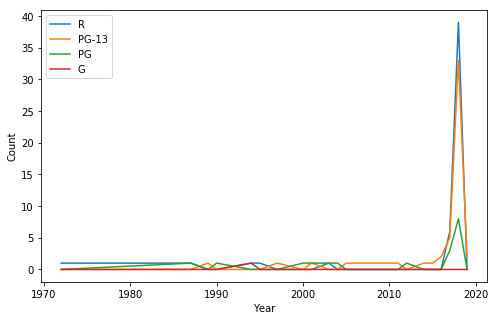

In [30]:
x = Level_yearDf.index.tolist()

plt.figure(figsize=(8,5))  #figure size

# Using Level Dataframe to build line chart
plt.plot(x, Level_yearDf.R.tolist(), label = 'R')
plt.plot(x, Level_yearDf['PG-13'].tolist(), label = 'PG-13')
plt.plot(x, Level_yearDf.PG.tolist(), label = 'PG')
plt.plot(x, Level_yearDf.G.tolist(), label = 'G')

plt.legend(loc = "upper left") #Legend Location

plt.xlabel('Year') # abscissa Label 
plt.ylabel('Count') # ordinate Label
plt.show()

#### 11. Director Analysis

In [31]:
top_Director = Dataframe.Director.value_counts()[:10].index.tolist()  #find director
directorMovieCount = Dataframe.Director.value_counts()[:10].tolist()  #count no. of movies of each director

In [32]:
def getDirectorDf(directorList, moviecountList, Dataframe):  #function to calculate data
    L = []   
    for i in range(len(directorList)):
        avgScore = Dataframe[Dataframe.Director == directorList[i]].Score.mean() #calculate average score
        totalGross = Dataframe[Dataframe.Director == directorList[i]].Gross_in_Million.sum() #calculate total gross
        rawList = [directorList[i], moviecountList[i], avgScore, totalGross] #get raw data
        L.append(rawList)
    directorDf = pd.DataFrame(L, columns = ['Director','Movie Count','Avg Score','Total Gross']) #create table
    return directorDf 

In [33]:
director_Dataframe = getDirectorDf(top_Director, directorMovieCount, Dataframe)
director_Dataframe # table of director

,Director,Movie Count,Avg Score,Total Gross
0,David Yates,4,7.50,1034.173505
1,Ron Howard,2,6.55,473.812337
2,Ryan Coogler,2,7.50,809.827147
3,Andy Muschietti,2,3.70,327.481748
4,Anthony Russo,2,4.25,678.815482
5,Jon Favreau,2,3.45,173.398518
6,Chris Columbus,2,7.55,603.336793
7,Christopher Nolan,2,8.80,722.878461
8,Brad Bird,2,7.95,869.958730
9,Stephen Merchant,1,0.00,0.000000
